<a href="https://colab.research.google.com/github/peterbabulik/QantumKernelsComputationalNetworks/blob/main/QantumKernelsComputatioNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

=== Quantum Network Kernel Demonstration ===

Initializing quantum network kernel...

Visualizing network structure...


<ipython-input-4-09698c1169b4>:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


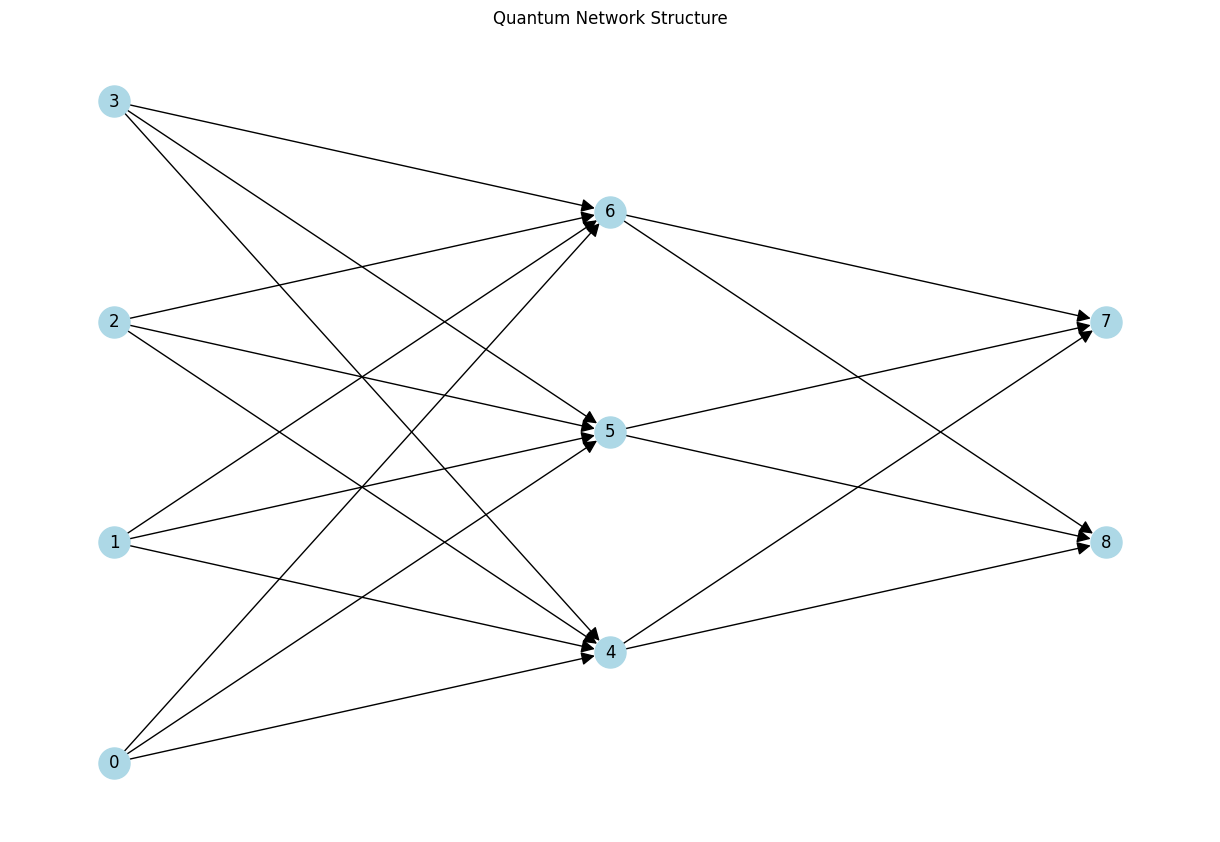


Generating sample data (4 samples, 4 features)...

Computing kernel matrix...


Computing kernel matrix: 100%|██████████| 4/4 [00:00<00:00, 13.77it/s]


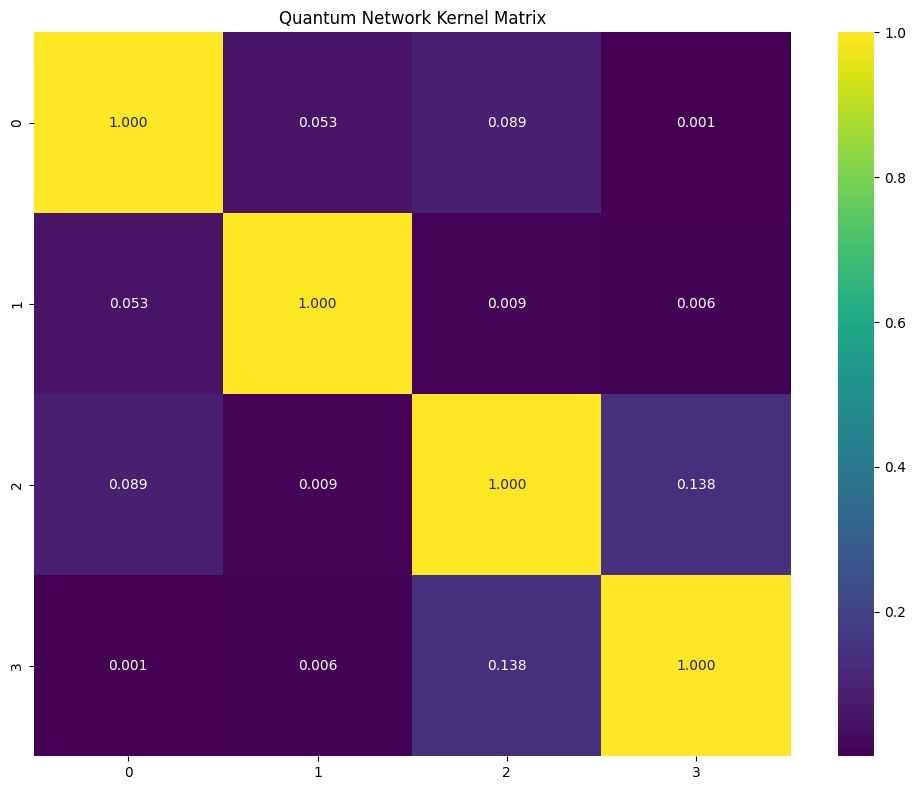


Kernel Statistics:
Matrix shape: (4, 4)
Mean kernel value: 0.2870
Min kernel value: 0.0006
Max kernel value: 1.0000


In [4]:

# First, install required packages
# !pip install cirq networkx matplotlib seaborn numpy tensorflow

"""
Quantum Network Kernel Implementation
-----------------------------------
A quantum kernel that behaves like a computational network.
"""

import cirq
import numpy as np
import tensorflow as tf
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from tqdm import tqdm

class QuantumNetKernel:
    """Quantum Network Kernel with computational network structure"""

    def __init__(self,
                 n_qubits: int,
                 layer_structure: List[int],
                 connection_type: str = 'dense',
                 activation: str = 'quantum_relu'):
        """Initialize Quantum Network Kernel"""
        self.n_qubits = n_qubits
        self.layer_structure = layer_structure
        self.connection_type = connection_type
        self.activation = activation
        self.qubits = cirq.LineQubit.range(n_qubits)
        self.simulator = cirq.Simulator()

        # Initialize network
        self.weights = self._initialize_weights()
        self.network = self._create_network()

    def _initialize_weights(self) -> Dict[str, np.ndarray]:
        """Initialize network weights"""
        weights = {}
        prev_size = self.n_qubits

        for i, layer_size in enumerate(self.layer_structure):
            # Initialize weights with scaling factor
            scale = 1.0 / np.sqrt(prev_size)
            weights[f'layer_{i}'] = np.random.uniform(
                -scale, scale,
                size=(prev_size, layer_size)
            ) * np.pi

            weights[f'bias_{i}'] = np.random.uniform(
                -scale, scale,
                size=layer_size
            ) * np.pi

            prev_size = layer_size

        return weights

    def _create_network(self) -> nx.DiGraph:
        """Create network structure"""
        G = nx.DiGraph()
        current_idx = 0
        layer_indices = []

        # Input layer
        input_indices = list(range(self.n_qubits))
        layer_indices.append(input_indices)
        for idx in input_indices:
            G.add_node(idx, layer=0, type='input')
        current_idx = self.n_qubits

        # Hidden layers
        for layer_num, size in enumerate(self.layer_structure, 1):
            layer_nodes = list(range(current_idx, current_idx + size))
            layer_indices.append(layer_nodes)

            for idx in layer_nodes:
                G.add_node(idx, layer=layer_num, type='hidden')

            current_idx += size

        # Add connections
        if self.connection_type == 'dense':
            for i in range(len(layer_indices) - 1):
                for src in layer_indices[i]:
                    for dst in layer_indices[i + 1]:
                        G.add_edge(src, dst)

        elif self.connection_type == 'residual':
            for i in range(len(layer_indices) - 1):
                # Regular connections
                for src in layer_indices[i]:
                    for dst in layer_indices[i + 1]:
                        G.add_edge(src, dst)
                # Skip connections
                if i < len(layer_indices) - 2:
                    for src in layer_indices[i]:
                        for dst in layer_indices[i + 2]:
                            G.add_edge(src, dst)

        return G

    def quantum_activation(self, value: float, qubit: cirq.Qid) -> List[cirq.Operation]:
        """Apply quantum activation function"""
        if self.activation == 'quantum_relu':
            return [
                cirq.ry(np.pi/4)(qubit),
                cirq.rz(max(0, value))(qubit),
                cirq.ry(-np.pi/4)(qubit)
            ]
        elif self.activation == 'quantum_sigmoid':
            sigmoid_value = 1 / (1 + np.exp(-value))
            return [cirq.ry(sigmoid_value * np.pi)(qubit)]
        else:
            return [cirq.ry(value)(qubit)]

    def create_quantum_circuit(self, x: np.ndarray) -> cirq.Circuit:
        """Create quantum circuit for input data"""
        circuit = cirq.Circuit()

        # Input encoding
        for i, qubit in enumerate(self.qubits):
            if i < len(x):
                circuit.append(cirq.ry(x[i])(qubit))

        # Process through layers
        current_layer_size = self.n_qubits
        for layer_idx in range(len(self.layer_structure)):
            next_layer_size = self.layer_structure[layer_idx]
            current_qubits = self.qubits[:current_layer_size]

            for i, qubit in enumerate(current_qubits):
                # Compute weighted sum
                weights = self.weights[f'layer_{layer_idx}']
                bias = self.weights[f'bias_{layer_idx}']

                weighted_sum = 0.0
                for j in range(min(next_layer_size, len(weights[i]))):
                    weighted_sum += weights[i][j]
                weighted_sum += bias[i % len(bias)]

                # Apply activation
                circuit.append(self.quantum_activation(weighted_sum, qubit))

                # Entanglement
                if i < current_layer_size - 1:
                    next_qubit = self.qubits[(i + 1) % self.n_qubits]
                    circuit.append(cirq.CNOT(qubit, next_qubit))

            current_layer_size = next_layer_size

        return circuit

    def compute_kernel_value(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """Compute kernel value between two points"""
        try:
            circuit1 = self.create_quantum_circuit(x1)
            circuit2 = self.create_quantum_circuit(x2)

            state1 = self.simulator.simulate(circuit1).final_state_vector
            state2 = self.simulator.simulate(circuit2).final_state_vector

            return np.abs(np.vdot(state1, state2))**2
        except Exception as e:
            print(f"Error in kernel computation: {str(e)}")
            return 0.0

    def compute_kernel_matrix(self, X: np.ndarray) -> np.ndarray:
        """Compute kernel matrix for dataset"""
        n_samples = len(X)
        kernel_matrix = np.zeros((n_samples, n_samples))

        for i in tqdm(range(n_samples), desc="Computing kernel matrix"):
            for j in range(i, n_samples):
                value = self.compute_kernel_value(X[i], X[j])
                kernel_matrix[i, j] = value
                kernel_matrix[j, i] = value

        return kernel_matrix

    def visualize_network(self):
        """Visualize network structure"""
        plt.figure(figsize=(12, 8))

        # Position nodes by layer
        pos = nx.multipartite_layout(
            self.network,
            subset_key='layer',
            align='vertical'
        )

        # Draw network
        nx.draw(self.network,
                pos,
                with_labels=True,
                node_color='lightblue',
                node_size=500,
                arrows=True,
                arrowsize=20)

        plt.title('Quantum Network Structure')
        plt.tight_layout()
        plt.show()

    def visualize_kernel_matrix(self, X: np.ndarray):
        """Visualize kernel matrix"""
        kernel_matrix = self.compute_kernel_matrix(X)

        plt.figure(figsize=(10, 8))
        sns.heatmap(kernel_matrix,
                   cmap='viridis',
                   annot=True,
                   fmt='.3f',
                   cbar=True)
        plt.title('Quantum Network Kernel Matrix')
        plt.tight_layout()
        plt.show()

        return kernel_matrix

# Example usage and testing
def run_example():
    print("=== Quantum Network Kernel Demonstration ===")

    # Network configuration
    n_qubits = 4
    layer_structure = [3, 2]  # Two hidden layers

    try:
        # Initialize kernel
        print("\nInitializing quantum network kernel...")
        qn_kernel = QuantumNetKernel(
            n_qubits=n_qubits,
            layer_structure=layer_structure,
            connection_type='dense',
            activation='quantum_relu'
        )

        # Visualize network
        print("\nVisualizing network structure...")
        qn_kernel.visualize_network()

        # Generate sample data
        n_samples = 4
        n_features = n_qubits
        print(f"\nGenerating sample data ({n_samples} samples, {n_features} features)...")
        X = np.random.uniform(-np.pi, np.pi, size=(n_samples, n_features))

        # Compute and visualize kernel matrix
        print("\nComputing kernel matrix...")
        kernel_matrix = qn_kernel.visualize_kernel_matrix(X)

        # Print statistics
        print("\nKernel Statistics:")
        print(f"Matrix shape: {kernel_matrix.shape}")
        print(f"Mean kernel value: {np.mean(kernel_matrix):.4f}")
        print(f"Min kernel value: {np.min(kernel_matrix):.4f}")
        print(f"Max kernel value: {np.max(kernel_matrix):.4f}")

    except Exception as e:
        print(f"\nError in demonstration: {str(e)}")
        import traceback
        traceback.print_exc()

# Run the demonstration
if __name__ == "__main__":
    run_example()